# Data Science Nanodegree - Blog Post
Created By: Renan Vieira Dias

--- 

### Rubrics for the Work
https://review.udacity.com/#!/rubrics/1507/view

### Titles For The Article

 - KeyWords:
    - Data
    - Job
    - Work
    - Employ
    - Skills
    - Language
    - Salary
    - Experience
    - Seniority
  
  
 - Brain Storm:
    - Requirements for Data Jobs
    - Data Jobs tools
    - What Data tells about Data Jobs
    - How much each skill is worth it on data



## Questions
  
- Which skills does each data job require?
    - ['LanguageWorkedWith']
    - ['LanguageDesireNextYear']
    - ['DatabaseWorkedWith']
    - ['DatabaseDesireNextYear']
    - ['PlatformWorkedWith']
    - ['PlatformDesireNextYear']
    - ['WebFrameWorkedWith']
    - ['WebFrameDesireNextYear']
    - ['MiscTechWorkedWith']
    - ['MiscTechDesireNextYear']
    - ['DevEnviron']
    - ['OpSys']
  
  
- How long you have to be in the field to get to be senior? (Or equivalent money)
    - ['YearsCodePro']
    - ['CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs']
        - alazar: the salary is different for each profession. (0-25%,26-50%,75%,)

  
- What are some variables that influence your salary per hours?
    - ['EdLevel']
    - ALL of the above ( Explain better this part)
        - alazar: for each of the profession or hole group?? sugestion: only the data professions

## Segment
- ['Country'] = ????? 
    - (Sugestions: Top countries by volume of type)
- ['Employment'] = ['Employed full-time','Employed part-time']
- ['devtype_interest'] = ['Data or business analyst','Data scientist or machine learning specialist','Database administrator','Engineer, data']

### Imports

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\renan\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Functions

In [2]:
def optionIsInCell(cell, option):
    if str(cell).find(option)!=-1:
        return 1
    return 0

In [3]:
def transformingColumnByOptions(df, column, options, prefix = False, separator='_'):
    for each in options:
        new_column = column + separator + each if prefix else each
        df[new_column] = df[column].apply(optionIsInCell, option = each)
    return df

In [4]:
def isOneOfTheList(x, list_options):
    for each in list_options:
        if each in x:
            return True
    return False

In [5]:
def getOptionOfMultipleSelection(df, column, separator = ';'):
    flat_list = []
    for sublist in df[column].dropna().str.split(pat=separator, expand=False):
        for item in sublist:
            if item not in flat_list:
                flat_list.append(item)
    return flat_list

### Reading Data Files

In [6]:
df = pd.read_csv('survey_results_public.csv')
df_schema = pd.read_csv('survey_results_schema.csv')

### Collecting Columns Options & Decoding

In [7]:
columnsOptions = {}
columnsToGetOptions =[
        'DevType'
        ,'EdLevel'
        ,'LanguageWorkedWith'
        ,'LanguageDesireNextYear'
        ,'DatabaseWorkedWith'
        ,'DatabaseDesireNextYear'
        ,'PlatformWorkedWith'
        ,'PlatformDesireNextYear'
        ,'WebFrameWorkedWith'
        ,'WebFrameDesireNextYear'
        ,'MiscTechWorkedWith'
        ,'MiscTechDesireNextYear'
        ,'DevEnviron'
        ,'OpSys'
    ]
for each in columnsToGetOptions:
    tempList = getOptionOfMultipleSelection(df,each)
    tempList.sort()
    columnsOptions[each] = tempList

In [8]:
# Creating each skill columns
for questionColumn in columnsToGetOptions:
    df = transformingColumnByOptions(df, questionColumn, columnsOptions[questionColumn])

### Checking the Employment
- Columns: Employment
- Question: Which of the following best describes your current employment status?
- Interest In the following DevTypes:
    - 'Employed full-time'
    - 'Employed part-time'

In [9]:
# Get only employed surveys
df = df[ df['Employment'].isin(['Employed full-time','Employed part-time']) ]

### Checking Every Work Title
- Columns: DevType
- Question: Which of the following describe you? Please select all that apply.
- Interest In the following DevTypes:
    - 'Data or business analyst'
    - 'Data scientist or machine learning specialist'
    - 'Database administrator'
    - 'Engineer, data'


In [10]:
devtype_interest = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
]

# Getting a list of the other jobs
devtype_not_interest = []
for each in columnsOptions['DevType']:
    if not each in devtype_interest:
        devtype_not_interest.append(each)

In [11]:
# Clearing those with no interest on data DevType
df = df.dropna(subset = ['DevType']).copy()
# df['datajobs'] = df['DevType'].apply( isOneOfTheList, list_options = devtype_interest)
# df = df[df['datajobs']]
# df = df.drop(['datajobs'], axis=1)

In [12]:
dataJobsOutputs = [
    'Data or business analyst'
    ,'Data scientist or machine learning specialist'
    ,'Database administrator'
    ,'Engineer, data'
    ,'Data Misture'
    ,'Data Partialy'
    ,'Not Data'
]

# Creating the data jobs Categories
def dataJobsClassificationMicro(DevType):
    for interest in devtype_interest:
        if interest == DevType:
            return interest
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'Data Misture'
    return 'Not Data'

def dataJobsClassificationMacro(DevType):
    for interest in devtype_interest:
        if interest == DevType:
            return 'DataJob'
    for interest in devtype_interest:
        if interest in DevType:
            for not_interest in devtype_not_interest:
                if not_interest in DevType:
                    return 'Data Partialy'
            return 'DataJob'
    return 'Not Data'

In [13]:
df['datajobsCategoryMicro'] = df['DevType'].apply( dataJobsClassificationMicro )
df['datajobsCategoryMacro'] = df['DevType'].apply( dataJobsClassificationMacro )

In [14]:
df[['DevType','datajobsCategoryMicro']].head(5)

,DevType,datajobsCategoryMicro
2,"Designer;Developer, back-end;Developer, front-...",Not Data
3,"Developer, full-stack",Not Data
4,"Academic researcher;Developer, desktop or ente...",Not Data
5,Data or business analyst;Data scientist or mac...,Data Misture
8,"Database administrator;Developer, back-end;Dev...",Data Partialy


In [15]:
df['datajobsCategoryMicro'].value_counts()

Not Data                                         51562
Data Partialy                                    14268
Data Misture                                       524
Data scientist or machine learning specialist      485
Data or business analyst                           378
Engineer, data                                     261
Database administrator                              84
Name: datajobsCategoryMicro, dtype: int64

### Understanding Job Skills

question. 


### Plotting Each Interest

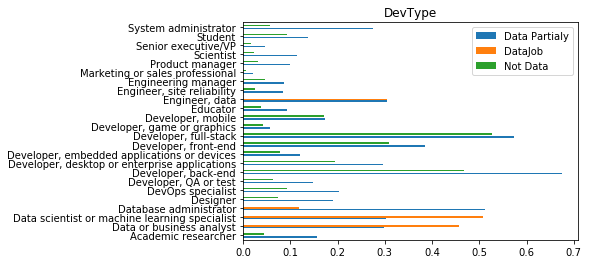

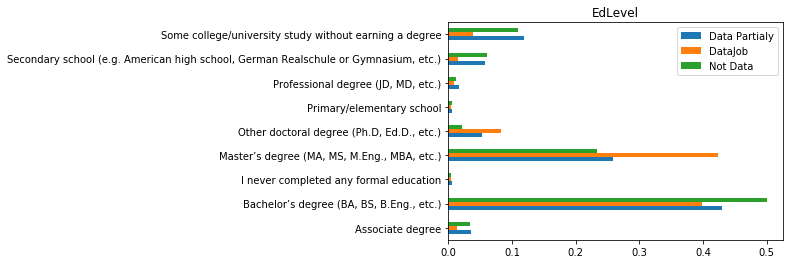

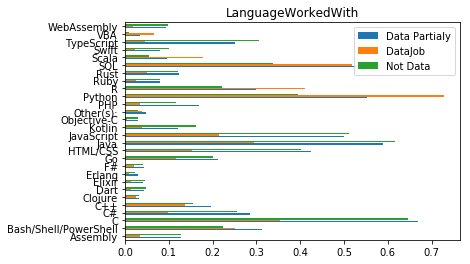

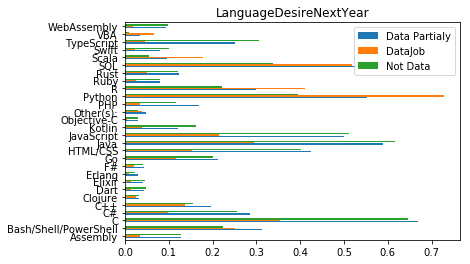

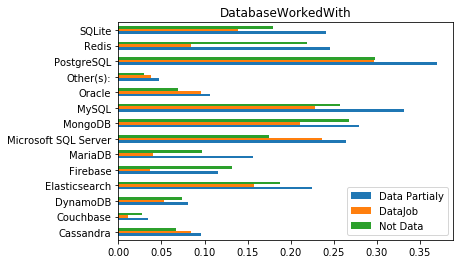

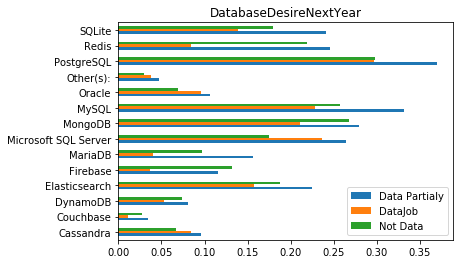

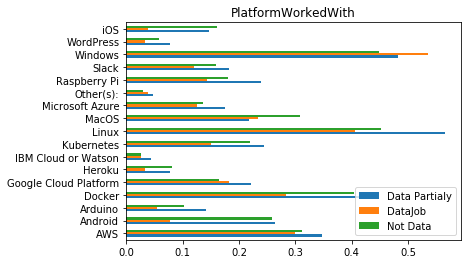

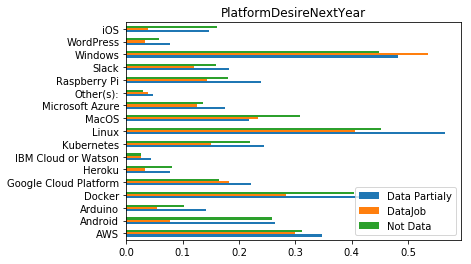

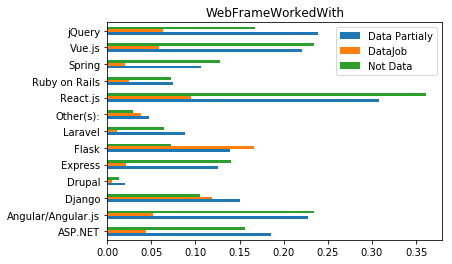

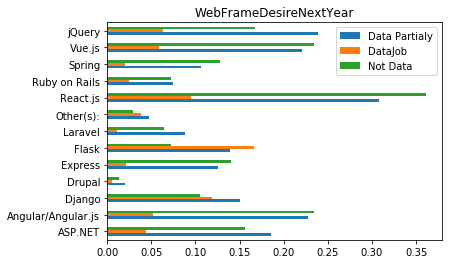

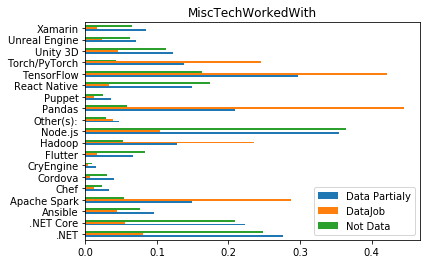

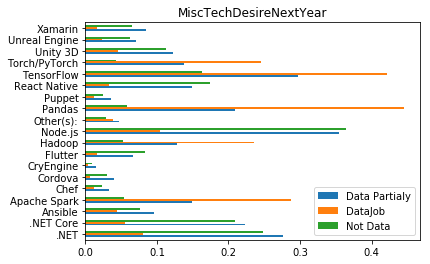

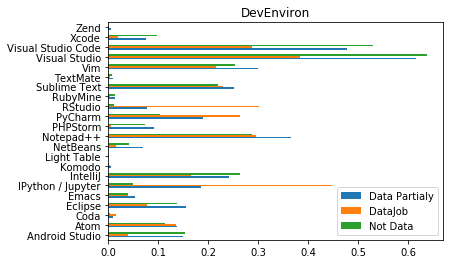

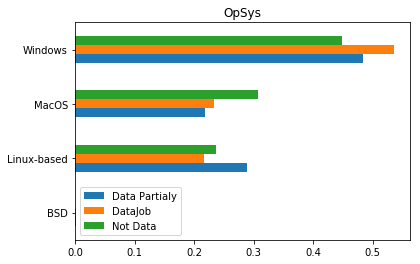

In [16]:
groupedResults = df.groupby(['datajobsCategoryMacro']).mean()
for skill in columnsOptions:
        groupedResults.reset_index()[columnsOptions[skill]].transpose().plot.barh()
        plt.legend(groupedResults.index)
        plt.title(skill)
        plt.show()


In [103]:
def colourMap(proportion):
    if proportion < 0.05:
        return (0.7, 0.0, 0.0, 1)
    elif proportion < 0.20:
        return (0.5, 0.0, 0.2, 1)
    elif proportion < 0.40:
        return (0.3, 0.0, 0.4, 1)
    elif proportion < 0.60:
        return (0.1, 0.0, 0.6, 1)
    elif proportion < 0.80:
        return (0.0, 0.0, 0.7, 1)
    else:
        return (0.0, 0.0, 0.5, 1)
    return 'error'

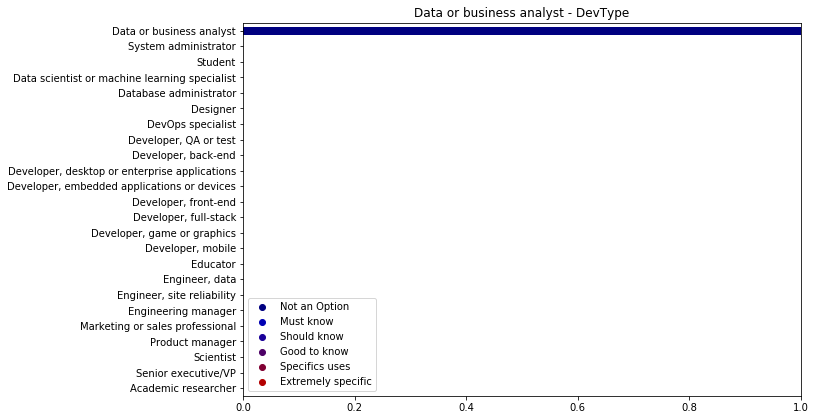

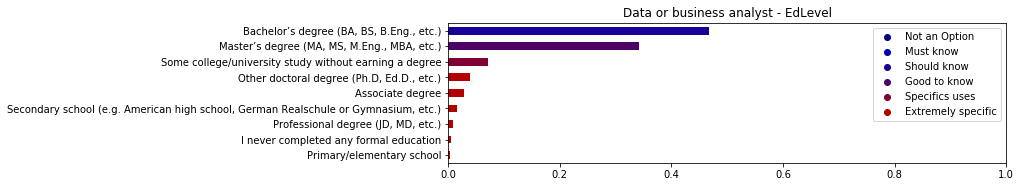

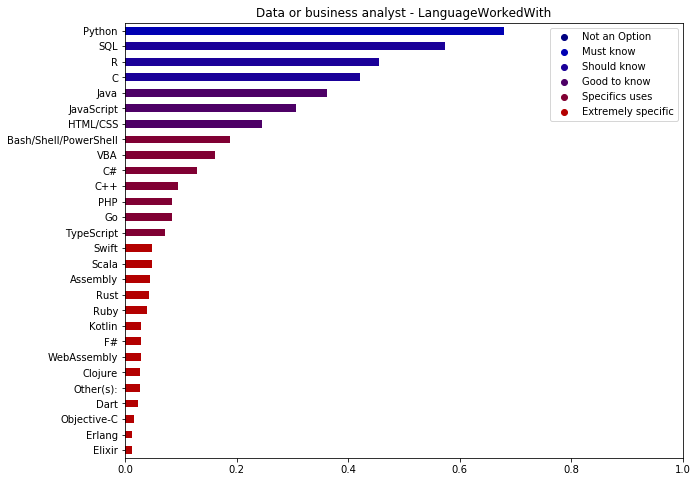

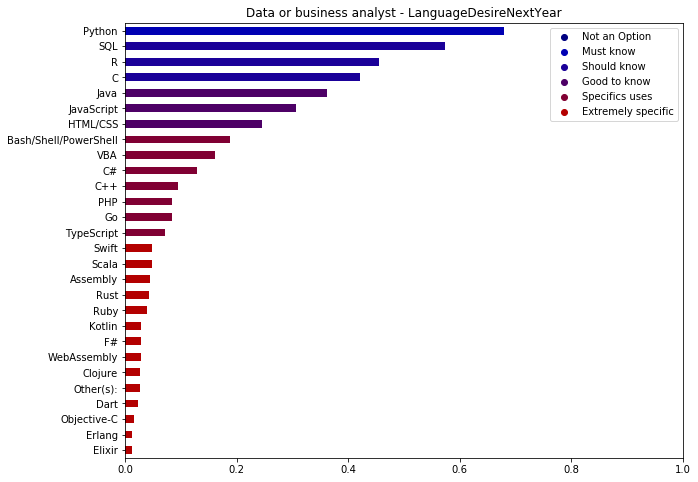

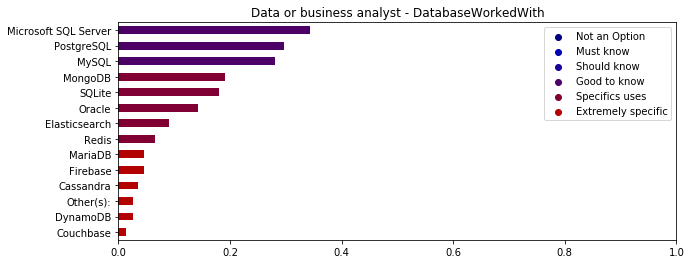

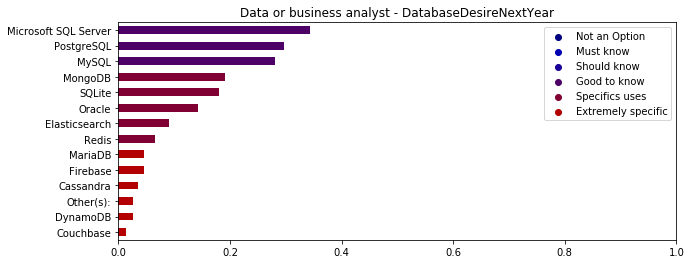

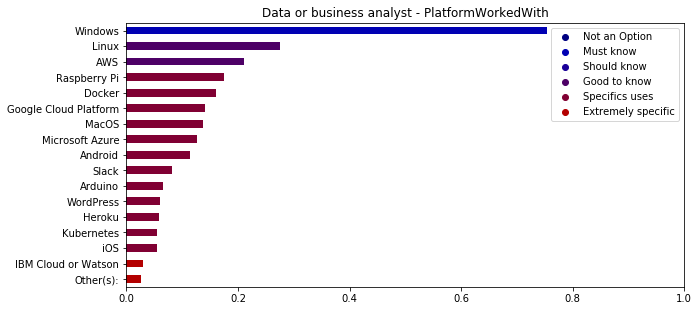

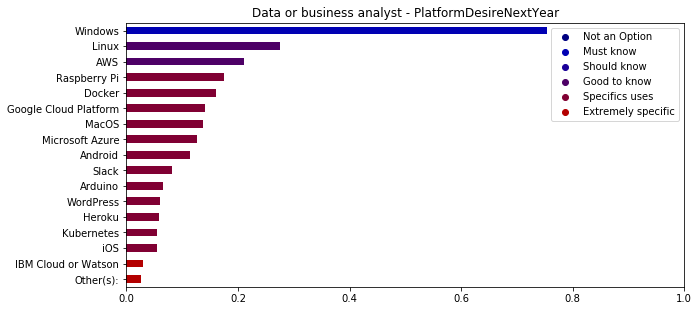

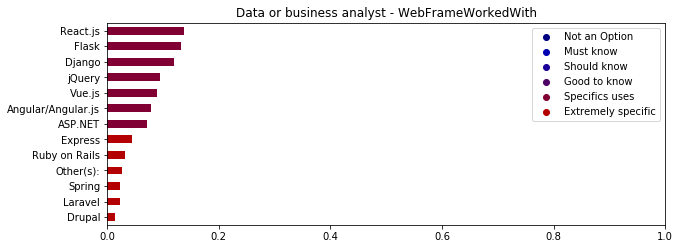

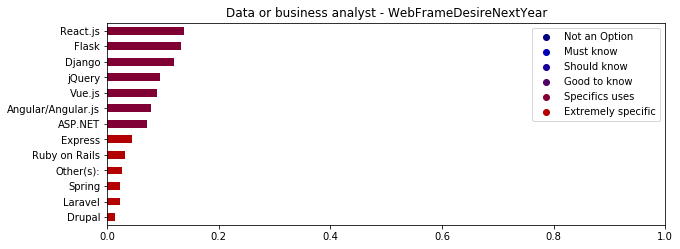

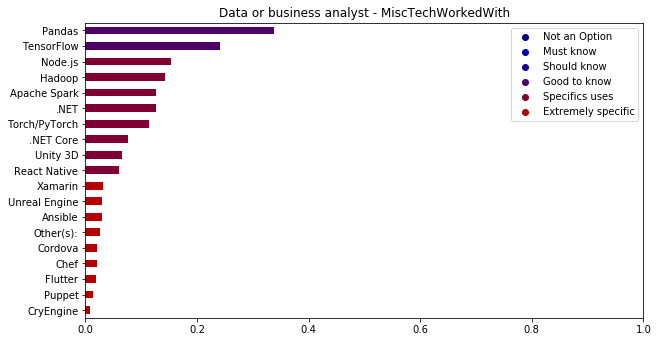

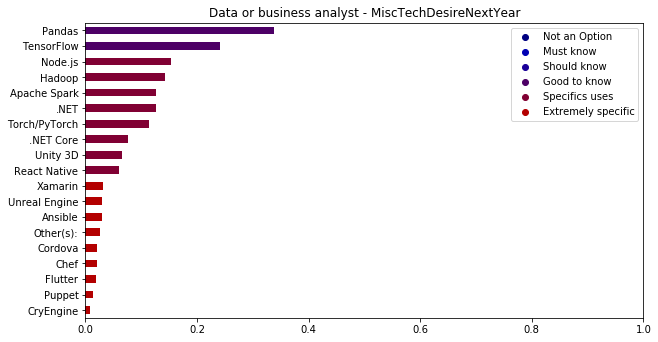

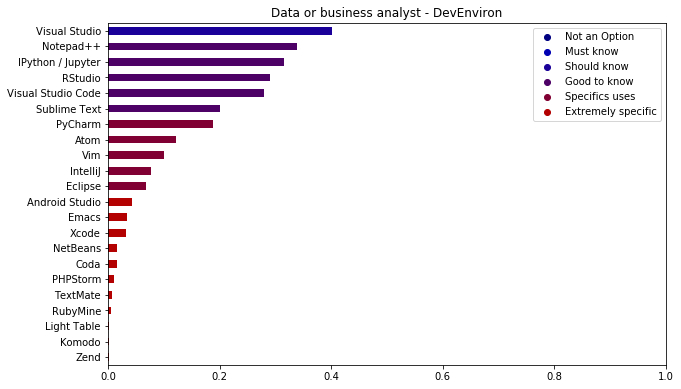

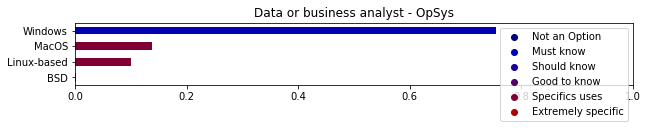

KeyError: '[\'Afghanistan\' \'Albania\' \'Algeria\' \'Andorra\' \'Angola\' \'Antigua and Barbuda\'\n \'Argentina\' \'Armenia\' \'Australia\' \'Austria\' \'Azerbaijan\' \'Bahrain\'\n \'Bangladesh\' \'Barbados\' \'Belarus\' \'Belgium\' \'Belize\' \'Benin\' \'Bhutan\'\n \'Bolivia\' \'Bosnia and Herzegovina\' \'Botswana\' \'Brazil\' \'Brunei Darussalam\'\n \'Bulgaria\' \'Burkina Faso\' \'Burundi\' \'Cambodia\' \'Cameroon\' \'Canada\'\n \'Cape Verde\' \'Chile\' \'China\' \'Colombia\' \'Congo, Republic of the...\'\n \'Costa Rica\' \'Croatia\' \'Cuba\' \'Cyprus\' \'Czech Republic\' "Côte d\'Ivoire"\n "Democratic People\'s Republic of Korea" \'Democratic Republic of the Congo\'\n \'Denmark\' \'Djibouti\' \'Dominican Republic\' \'Ecuador\' \'Egypt\' \'El Salvador\'\n \'Estonia\' \'Ethiopia\' \'Fiji\' \'Finland\' \'France\' \'Georgia\' \'Germany\' \'Ghana\'\n \'Greece\' \'Guatemala\' \'Guinea\' \'Guyana\' \'Haiti\' \'Honduras\'\n \'Hong Kong (S.A.R.)\' \'Hungary\' \'Iceland\' \'India\' \'Indonesia\' \'Iran\' \'Iraq\'\n \'Ireland\' \'Israel\' \'Italy\' \'Jamaica\' \'Japan\' \'Jordan\' \'Kazakhstan\' \'Kenya\'\n \'Kuwait\' \'Kyrgyzstan\' "Lao People\'s Democratic Republic" \'Latvia\'\n \'Lebanon\' \'Liberia\' \'Libyan Arab Jamahiriya\' \'Liechtenstein\' \'Lithuania\'\n \'Luxembourg\' \'Madagascar\' \'Malawi\' \'Malaysia\' \'Maldives\' \'Mali\' \'Malta\'\n \'Mauritania\' \'Mauritius\' \'Mexico\' \'Monaco\' \'Mongolia\' \'Montenegro\'\n \'Morocco\' \'Mozambique\' \'Myanmar\' \'Namibia\' \'Nepal\' \'Netherlands\'\n \'New Zealand\' \'Nicaragua\' \'Nigeria\' \'Norway\' \'Oman\'\n \'Other Country (Not Listed Above)\' \'Pakistan\' \'Panama\' \'Paraguay\' \'Peru\'\n \'Philippines\' \'Poland\' \'Portugal\' \'Qatar\' \'Republic of Korea\'\n \'Republic of Moldova\' \'Romania\' \'Russian Federation\' \'Rwanda\'\n \'Saint Vincent and the Grenadines\' \'San Marino\' \'Saudi Arabia\' \'Senegal\'\n \'Serbia\' \'Seychelles\' \'Sierra Leone\' \'Singapore\' \'Slovakia\' \'Slovenia\'\n \'Somalia\' \'South Africa\' \'South Korea\' \'Spain\' \'Sri Lanka\' \'Sudan\'\n \'Swaziland\' \'Sweden\' \'Switzerland\' \'Syrian Arab Republic\' \'Taiwan\'\n \'Tajikistan\' \'Thailand\' \'The former Yugoslav Republic of Macedonia\'\n \'Timor-Leste\' \'Togo\' \'Trinidad and Tobago\' \'Tunisia\' \'Turkey\'\n \'Turkmenistan\' \'Uganda\' \'Ukraine\' \'United Arab Emirates\' \'United Kingdom\'\n \'United Republic of Tanzania\' \'United States\' \'Uruguay\' \'Uzbekistan\'\n \'Venezuela, Bolivarian Republic of...\' \'Viet Nam\' \'Yemen\' \'Zambia\'\n \'Zimbabwe\'] not in index'

In [124]:
# .sort_values('Speed')
for eachOutput in dataJobsOutputs:
    groupedResults = df[df['datajobsCategoryMicro']==eachOutput].groupby(['datajobsCategoryMicro']).mean()
    for skill in columnsOptions:
            groupedSkill = groupedResults.reset_index()[columnsOptions[skill]].transpose().sort_values(0,ascending=True)
            colour = groupedSkill[0].apply(colourMap)
            ysize = groupedSkill.shape[0]/3.5
            groupedSkill.plot.barh(figsize=(10,ysize), color=colour)
            plt.title(eachOutput + ' - ' + skill)
            plt.xlim((0,1))
            
            legendPlot_100 = plt.scatter([-1], [-1], color=colourMap(0.90))
            legendPlot_80l = plt.scatter([-1], [-1], color=colourMap(0.70))
            legendPlot_60l = plt.scatter([-1], [-1], color=colourMap(0.50))
            legendPlot_40l = plt.scatter([-1], [-1], color=colourMap(0.30))
            legendPlot_20l = plt.scatter([-1], [-1], color=colourMap(0.10))
            legendPlot_05l = plt.scatter([-1], [-1], color=colourMap(0.04))
            plt.legend((legendPlot_100,legendPlot_80l,legendPlot_60l,legendPlot_40l,legendPlot_20l,legendPlot_05l),
                       ('Not an Option','Must know','Should know','Good to know','Specifics uses','Extremely specific'))
            
            plt.show()


In [19]:
# .sort_values('Speed')
for eachOutput in dataJobsOutputs:
    print('-----------' + eachOutput + '----------')
    groupedResults = df[df['datajobsCategoryMicro']==eachOutput].groupby(['datajobsCategoryMicro']).mean()
    for skill in columnsOptions:
            print( '\n' + eachOutput + '   ---   ' + skill)
            print(groupedResults.reset_index()[columnsOptions[skill]].transpose().sort_values(0,ascending=False))

-----------Data or business analyst----------

Data or business analyst   ---   DevType
                                                 0
Data or business analyst                       1.0
Academic researcher                            0.0
Student                                        0.0
Senior executive/VP                            0.0
Scientist                                      0.0
Product manager                                0.0
Marketing or sales professional                0.0
Engineering manager                            0.0
Engineer, site reliability                     0.0
Engineer, data                                 0.0
Educator                                       0.0
Developer, mobile                              0.0
Developer, game or graphics                    0.0
Developer, full-stack                          0.0
Developer, front-end                           0.0
Developer, embedded applications or devices    0.0
Developer, desktop or enterprise applications

Database administrator   ---   LanguageWorkedWith
                              0
SQL                    0.690476
Python                 0.392857
Bash/Shell/PowerShell  0.333333
C                      0.261905
C#                     0.166667
R                      0.166667
Java                   0.166667
JavaScript             0.142857
HTML/CSS               0.107143
Go                     0.095238
Assembly               0.047619
Rust                   0.047619
Swift                  0.035714
Other(s):              0.035714
PHP                    0.035714
Ruby                   0.035714
Scala                  0.023810
TypeScript             0.023810
Dart                   0.023810
VBA                    0.023810
C++                    0.023810
Kotlin                 0.011905
Elixir                 0.011905
Objective-C            0.000000
F#                     0.000000
Erlang                 0.000000
Clojure                0.000000
WebAssembly            0.000000

Database administrato


Not Data   ---   DevType
                                                      0
Developer, full-stack                          0.526318
Developer, back-end                            0.467224
Developer, front-end                           0.308386
Developer, desktop or enterprise applications  0.193999
Developer, mobile                              0.172181
Student                                        0.093945
DevOps specialist                              0.093034
Developer, embedded applications or devices    0.079186
Designer                                       0.072999
Developer, QA or test                          0.063613
System administrator                           0.057794
Engineering manager                            0.046139
Academic researcher                            0.043811
Developer, game or graphics                    0.041639
Educator                                       0.038148
Product manager                                0.032078
Engineer, site reliabi

### Article Intro
    Are you in a data carrear path? You love to extract, transform and load data? Organize its storage? Undestand what it is telling you about your business? Creating models on it? And are you not shure about what you should be learning or the tecnologies you should master? You are not alone. Fortunately Stack Overflow is here to help us again, actually its survey data from 2019.

### Structure Of Each Scope
    There are several jobs that works with data, but our interest lays on those that have the main objective to storage it or to analyse it. The data jobs from the survey are: 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator' and 'Engineer, data'. For each of these jobs there are main Programming Language they use, the databases they work on, the platforms, Web Framework, the development enviroment, the operational system they work on and some other technologies. And for each of those, there is it frequency on the market that varies from: Extremely specific ([0%,5%[ of use in the market), only for specifics uses ([5%,20%[), good to know ([20%,40%[), should know ([40%,60%[), Must Know ([60%,80%[), Not a option ([80%,100%]).
    Follow below witch skills you should know, and for those you don't know yet, just click in the link next to it to learn a little about it.



### Data Analyst
 - Languages:
   - Not a option: -
   - Must Know: Python 68%
   - should know: SQL 57%, R 45%, C 42%
   - good to know: Java 36%, JavaScript 31%, HTML/CSS 25%
   - only for specifics uses: Bash/Shell/PowerShell 19%, VBA 16%, C# 13%, C++ 10%, PHP 8%, Go 8%, TypeScript 7%
   - extremely specifc: Swift 4%, Scala 4%, Assembly 4%, Rust 4%, Ruby 3%, F 2%, WebAssembly 2%, Kotlin 2%, Clojure 2%, Dart 2%, Objective-C 1%, Erlang 1%, Elixir 1%



    - Databases:
        - Microsoft SQL Server
        - PostgreSQL
        - MySQL
        - MongoDB
    - Platforms:
        - Windows
        - Linux
        - AWS
    - Web Frame Worked


### Data Science


### Data Eng.


### DataBase Administrator

In [20]:
# Checking the distribution of 'Data Misture'
groupedResults.reset_index()[groupedResults.reset_index()['datajobsCategoryMicro']=='Data Misture'][devtype_interest].transpose()

""
Data or business analyst
Data scientist or machine learning specialist
Database administrator
"Engineer, data"


(Review) C


Sugestion: DATA RELATED AREA (GROUP FIRST?)

### Calculating Equivalent Salary
  
  
To calculate the seniority of a salary?
 - By Country
 - By Job Profession
 - At least 100
 - Histogram with quarter?
     - Junior 0-25%
     - Pleno 26-50%
     - Senior 51-75%
     - Specialist 100%
  
  
 - Plot
     - Top countries 1 for each top 5
     - X - Years of experience
     - Y - DollarPerHour
     - Colour - DataType

In [21]:
weeksInYear = 52
df['DollarPerHour'] = df['ConvertedComp']/df['WorkWeekHrs']/weeksInYear
df[['Country','CurrencySymbol','CurrencyDesc','CompTotal','CompFreq','ConvertedComp','WorkWeekHrs','DollarPerHour']].head(5)

,Country,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,DollarPerHour
2,Thailand,THB,Thai baht,23000.0,Monthly,8820.0,40.0,4.240385
3,United States,USD,United States dollar,61000.0,Yearly,61000.0,80.0,14.663462
4,Ukraine,UAH,Ukrainian hryvnia,NaN,NaN,NaN,55.0,NaN
5,Canada,CAD,Canadian dollar,40000.0,Monthly,366420.0,15.0,469.769231
8,New Zealand,NZD,New Zealand dollar,138000.0,Yearly,95179.0,32.0,57.198918


In [22]:
def cleaningYearsOfCode(text):
    if text == 'Less than 1 year':
        return 0.5
    elif text == 'More than 50 years':
        return 55
    return text

In [23]:
df['YearsCodeProFix'] = df['YearsCodePro'].apply(cleaningYearsOfCode)
df['YearsCodeProFix'].head()

2      1
3    0.5
4      9
5      3
8      4
Name: YearsCodeProFix, dtype: object

In [24]:
# dfSalary = df[df['Country']=='Brazil']
# dfSalary = df[df['Country']=='United States']
dfSalary = df

dfSalaryClean = dfSalary.dropna( subset = ['Country','YearsCodeProFix','DollarPerHour','datajobsCategoryMicro'])
dfSalaryClean[['Country','YearsCodeProFix','DollarPerHour','datajobsCategoryMicro']].head(5)

,Country,YearsCodeProFix,DollarPerHour,datajobsCategoryMicro
2,Thailand,1,4.240385,Not Data
3,United States,0.5,14.663462,Not Data
5,Canada,3,469.769231,Data Misture
8,New Zealand,4,57.198918,Data Partialy
9,India,10,3.651923,Data Partialy


In [25]:
dfSalaryClean[['Country','YearsCodeProFix','DollarPerHour']]

,Country,YearsCodeProFix,DollarPerHour
2,Thailand,1,4.240385
3,United States,0.5,14.663462
5,Canada,3,469.769231
8,New Zealand,4,57.198918
9,India,10,3.651923
12,United States,8,43.269231
13,Germany,2,27.432692
15,United Kingdom,3,218.919231
16,Australia,2,27.896154
17,Russian Federation,3,10.575000


In [26]:
dataJobsOutputs

['Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Engineer, data',
 'Data Misture',
 'Data Partialy',
 'Not Data']

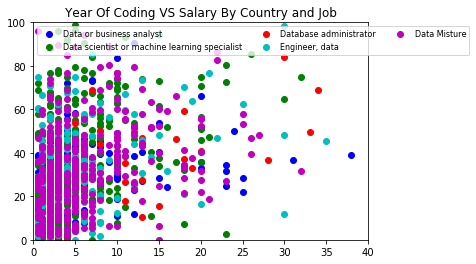

In [27]:
colors = ['b','g','r','c','m','y','k','b','b','b']

dataPlots = {}
i = 0
# for each in ['Data or business analyst']:
for each in dataJobsOutputs:
    if not each in ['Not Data','Data Partialy']:
        dftemp = dfSalaryClean[dfSalaryClean['datajobsCategoryMicro']==each]
        dataPlots[each] = plt.scatter(dftemp['YearsCodeProFix'], dftemp['DollarPerHour'], color=colors[i])
        i = i + 1

plt.legend(dataPlots.values(),
           dataPlots.keys(),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)


plt.ylim((0, 100))
plt.xlim((0, 40))
plt.title( 'Year Of Coding VS Salary By Country and Job' )

plt.show()

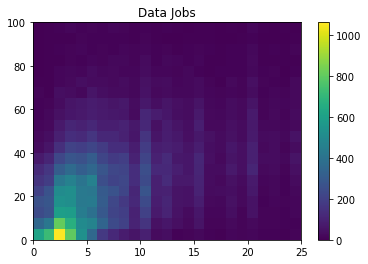

In [28]:
fig, ax = plt.subplots()
dftemp = dfSalaryClean[dfSalaryClean['datajobsCategoryMicro'].isin(['Not Data','Data Partialy'])]
h = plt.hist2d(dftemp['YearsCodeProFix'].apply(float),
           dftemp['DollarPerHour'],
           range = [[0,25],[0,100]], #[[xmin, xmax], [ymin, ymax]]
           bins = [25, 20]
          )
plt.title('Data Jobs')
plt.colorbar(h[3], ax=ax)
plt.show()

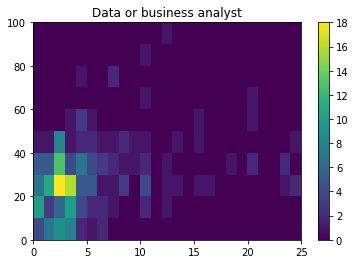

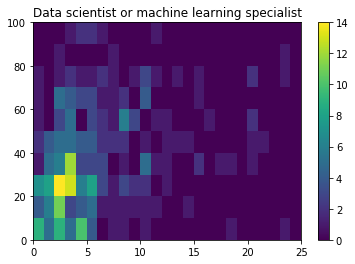

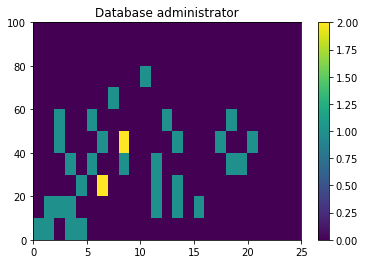

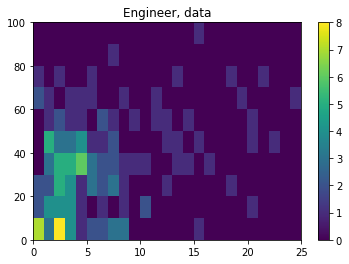

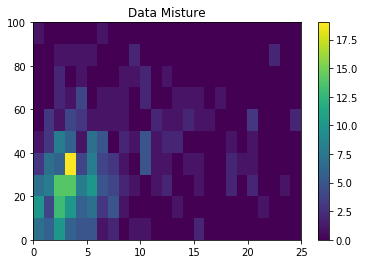

In [29]:
for each in dataJobsOutputs:
    if not each in ['Not Data','Data Partialy']:
        fig, ax = plt.subplots()
        dftemp = dfSalaryClean[dfSalaryClean['datajobsCategoryMicro']==each]
        h = plt.hist2d(dftemp['YearsCodeProFix'].apply(float),
                   dftemp['DollarPerHour'],
                   #cmin=3,
                   range = [[0,25],[0,100]], #[[xmin, xmax], [ymin, ymax]]
                   bins = [25, 10]
                  )
        plt.title(each)
        plt.colorbar(h[3], ax=ax)
        plt.show()

### Creating Simple Model

Separating into training and test

In [30]:
tempList = getOptionOfMultipleSelection(df,'Country')
tempList.sort()
columnsOptions['Country'] = tempList

dfSalaryClean = transformingColumnByOptions(dfSalaryClean, 'Country', columnsOptions['Country']).copy()

C:\Users\renan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [31]:
modelColumnsPrep =[
    'DevType'
    ,'Country'
    ,'EdLevel'
    ,'LanguageWorkedWith'
    ,'DatabaseWorkedWith'
    ,'PlatformWorkedWith'
    ,'WebFrameWorkedWith'
    ,'MiscTechWorkedWith'
    ,'DevEnviron'
    ,'OpSys'
]

    
targetColumns = ['DollarPerHour']

modelColumns = [
    'YearsCodeProFix' 
]

for each in modelColumnsPrep:
    for item in columnsOptions[each]:
        modelColumns.append(item)
# modelColumns

In [32]:
# MinMaxScaler
# scaler = MinMaxScaler() # default=(0, 1)
# features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
# features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])


In [33]:
X_train, X_test, y_train, y_test = train_test_split(dfSalaryClean[modelColumns], 
                                                    dfSalaryClean[targetColumns], 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [34]:
model = {}
model['LinearRegression'] = {'model':LinearRegression()}
model['Lasso'] = {'model':Lasso()}
model['DecisionTreeRegressor'] = {'model':DecisionTreeRegressor(min_samples_split=20,max_depth=3)}

In [35]:
for eachModel in model:
    model[eachModel]['model'].fit(X_train, y_train)
    model[eachModel]['predTrain'] = model[eachModel]['model'].predict(X_train)
    model[eachModel]['predTest'] = model[eachModel]['model'].predict(X_test)
    model[eachModel]['trainR2'] = r2_score( y_train, model[eachModel]['predTrain'] )
    model[eachModel]['testR2'] = r2_score( y_test, model[eachModel]['predTest'] )
    print(eachModel + ' - R2Train: ' + str(model[eachModel]['trainR2']) + ' R2Test: ' + str(model[eachModel]['testR2']) )

LinearRegression - R2Train: 0.0933858689032 R2Test: -350554612181.0
Lasso - R2Train: 0.0711486999712 R2Test: 0.0254525274982
DecisionTreeRegressor - R2Train: 0.0730049446059 R2Test: 0.0263381622663


In [36]:
# r2_score, mean_squared_error